In [1]:
#  Author: 2021. Jingyan Li
#  Calculate abnormality level for validation days

import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import pickle
import matplotlib.patches as patches
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
from utils import dataload_utils


In [2]:
DATA_DIR = r"C:\Users\jingyli\OwnDrive\IPA\data\2021_IPA\ori\Berlin\validation"
FIG_DIR = r"C:\Users\jingyli\OwnDrive\IPA\result\raw_data_stats"

# Load Data
## Road networks

In [3]:
# Road Mask
MASK_PATH = r"C:\Users\jingyli\OwnDrive\IPA\python-eda-code\utils\Berlin.mask"

road = pickle.load(open(MASK_PATH, "rb"))

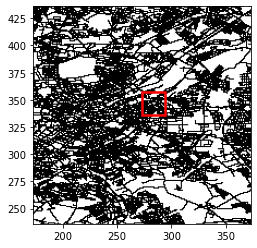

In [4]:
# Visualize road network
window = [16,13]
window_size = 21

fig, axes = plt.subplots(1, 1,)
axes.imshow(road, vmin=0, vmax=1, cmap="binary")
if window:
    rect = patches.Rectangle((window[1] * window_size, window[0] * window_size),
                             window_size, window_size,
                             linewidth=2.5, edgecolor="red", facecolor="none")
    axes.add_patch(rect)
    axes.set_xlim(window[1] * window_size - 100, window[1] * window_size + 100)
    axes.set_ylim(window[0] * window_size - 100, window[0] * window_size + 100)
plt.show()

## Read Incident Levels

In [5]:
# Speed/Volume/incident
volume_arr = np.zeros((18, 288, 495, 436))
speed_arr = np.zeros((18, 288, 495, 436))
incident_arr = np.zeros((18, 288, 495, 436))

volume_idx = np.arange(0,8,2)
speed_idx = np.arange(1,8,2)
# Iterate through all days and get the speed/volume per pixel
for i, file in enumerate(glob.glob(os.path.join(DATA_DIR,"*.h5"))):
    d = dataload_utils.load_h5_file(file)
    v = np.mean(d[:, :, :, volume_idx], axis=-1)
    s = np.mean(d[:, :, :, speed_idx], axis=-1)
    ic = d[:, :, :, -1]
    volume_arr[i] = v
    speed_arr[i] = s
    incident_arr[i] = ic
    del d,v,s,ic
    print(file.split("\\")[-1])
#     if i==0:
#         break

2019-07-01_berlin_9ch.h5
2019-07-11_berlin_9ch.h5
2019-07-21_berlin_9ch.h5
2019-07-31_berlin_9ch.h5
2019-08-10_berlin_9ch.h5
2019-08-20_berlin_9ch.h5
2019-08-30_berlin_9ch.h5
2019-09-09_berlin_9ch.h5
2019-09-19_berlin_9ch.h5
2019-09-29_berlin_9ch.h5
2019-10-09_berlin_9ch.h5
2019-10-19_berlin_9ch.h5
2019-10-29_berlin_9ch.h5
2019-11-08_berlin_9ch.h5
2019-11-18_berlin_9ch.h5
2019-11-28_berlin_9ch.h5
2019-12-08_berlin_9ch.h5
2019-12-18_berlin_9ch.h5


# Global Distribution of Incident Level

WHEN `type` = 'ROAD_CLOSURE' AND criticality = 'minor'        THEN 120

WHEN `type` = 'ROAD_CLOSURE' AND criticality = 'major'        THEN 240

WHEN `type` = 'ROAD_CLOSURE' AND criticality = 'critical'     THEN 360

WHEN `type` = 'LANE_RESTRICTION' AND criticality = 'minor'    THEN  80

WHEN `type` = 'LANE_RESTRICTION' AND criticality = 'major'    THEN 160

WHEN `type` = 'LANE_RESTRICTION' AND criticality = 'critical' THEN 240

WHEN `type` = 'ROAD HAZARD' AND criticality = 'minor'         THEN  70

WHEN `type` = 'ROAD HAZARD' AND criticality = 'major'         THEN 140

WHEN `type` = 'ROAD HAZARD' AND criticality = 'critical'      THEN 210

WHEN `type` = 'PLANNED EVENT' AND criticality = 'minor'       THEN  60

WHEN `type` = 'PLANNED EVENT' AND criticality = 'major'       THEN 120

WHEN `type` = 'PLANNED EVENT' AND criticality = 'critical'    THEN 180

WHEN `type` = 'CONSTRUCTION' AND criticality = 'minor'        THEN  50

WHEN `type` = 'CONSTRUCTION' AND criticality = 'major'        THEN 100

WHEN `type` = 'CONSTRUCTION' AND criticality = 'critical'     THEN 150

In [5]:
INCIDENT_LEVEL = {
    120: "ROAD_CLOSURE-MINOR" +","+ "PLANNED_EVENT-MAJOR",
    240: "ROAD_CLOSURE-MAJOR" +","+ "LANE_RESTRICTION-CRITICAL",
    360: "ROAD_CLOSURE-CRITICAL",
    80: "LANE_RESTRICTION-MINOR",
    160: "LANE_RESTRICTION-MAJOR",
    70: "ROAD_HAZARD-MINOR",
    140: "ROAD_HAZARD-MAJOR",
    210: "ROAD_HAZARD-CRITICAL",
    60: "PLANNED_EVENT-MINOR",
    180: "PLANNED_EVENT-CRITICAL",
    50: "CONSTRUCTION-MINOR",
    100: "CONSTRUCTION-MAJOR",
    150: "CONSTRUCTION-CRITICAL",
}

In [106]:
np.arange(12).reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
incident_arr.shape

(18, 288, 495, 436)

## Distribution of pixels of incidents

In [12]:
incident_overall_arr = np.sum(incident_arr, axis=(0,1))/(18*288)
incident_overall_road = incident_overall_arr[road]

In [23]:
incident_overall_err = np.std(incident_arr, axis=(0,1))
incident_overall_err_road = incident_overall_err[road]

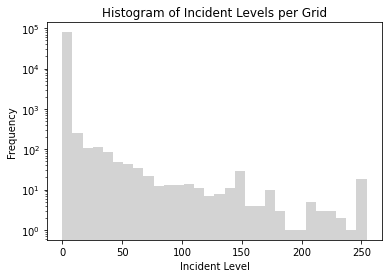

In [20]:
plt.hist(incident_overall_road, bins=30, color="lightgrey")
plt.yscale("log")
plt.title("Histogram of Incident Levels per Grid")
plt.ylabel("Frequency")
plt.xlabel("Incident Level")
plt.savefig(os.path.join(FIG_DIR,"incident_hist.pdf"), bbox_inches="tight")
plt.show()

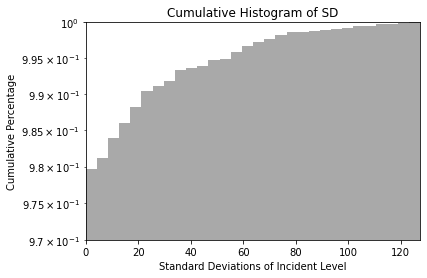

In [123]:
plt.hist(incident_overall_err_road, bins=30, 
         color="darkgrey",
         cumulative=True,
         weights=np.ones(len(incident_overall_err_road)) / len(incident_overall_err_road))
plt.yscale("log")
plt.title("Cumulative Histogram of SD")
plt.ylabel("Cumulative Percentage")
plt.xlabel("Standard Deviations of Incident Level")
plt.xlim(0, max(incident_overall_err_road))
plt.ylim(0.97,1)
plt.savefig(os.path.join(FIG_DIR,"incident_err_hist.pdf"), bbox_inches="tight")
plt.show()

## When pixels within road network, how the incident level distributes?

In [7]:
incident_dsb = incident_arr.reshape(-1, incident_arr.shape[-2], incident_arr.shape[-1])[:, road].reshape(-1)
value, count = np.unique(incident_dsb, return_counts=True)

In [8]:
df = pd.DataFrame(data=np.array([value, count]).transpose(), columns=["value","count"])
df["incident"] = df["value"].apply(lambda _ : INCIDENT_LEVEL[int(_)] if int(_) in INCIDENT_LEVEL.keys() else "None")
df['percent'] = df["count"]/df["count"].sum()
df.sort_values("percent", ascending=False)

,value,count,incident,percent
0,0.0,416719018.0,None,9.950931e-01
1,50.0,838637.0,CONSTRUCTION-MINOR,2.002601e-03
9,150.0,704762.0,CONSTRUCTION-CRITICAL,1.682918e-03
20,255.0,362449.0,None,8.655005e-04
5,100.0,96539.0,CONSTRUCTION-MAJOR,2.305277e-04
4,80.0,14074.0,LANE_RESTRICTION-MINOR,3.360764e-05
14,200.0,13829.0,None,3.302259e-05
12,180.0,7315.0,PLANNED_EVENT-CRITICAL,1.746766e-05
3,70.0,5625.0,ROAD_HAZARD-MINOR,1.343207e-05
19,250.0,2864.0,None,6.839013e-06


# Grids with high volume/ speed

Get pixels with enough volume / speed

In [6]:
median_vol = np.median(volume_arr, axis=(0,1))
mean_vol = np.mean(volume_arr, axis=(0,1))

median_speed = np.median(speed_arr, axis=(0,1))
mean_speed = np.mean(speed_arr, axis=(0,1))

In [77]:
# Get pixels with enough volume
volume_mask = median_vol >

pcoords_vmask = np.argwhere(volume_mask)
pcoords_vmask.shape

(26, 2)

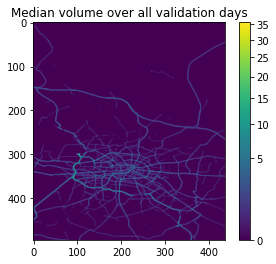

In [36]:
# Plot
from matplotlib.colors import PowerNorm
plt.figure(figsize=(5,4))
plt.imshow(
    median_vol,
#     np.ma.masked_where(np.invert(road), median_vol), 
            norm=PowerNorm(gamma=0.5),
           cmap="viridis")
plt.colorbar()
plt.title("Median volume over all validation days")
plt.savefig(os.path.join(FIG_DIR,f"volume_map.pdf"), bbox_inches="tight")
plt.show()

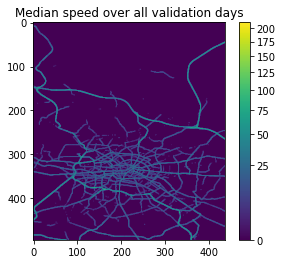

In [37]:
# Plot
from matplotlib.colors import PowerNorm
plt.figure(figsize=(5,4))
plt.imshow(
    median_speed,
#     np.ma.masked_where(np.invert(road), median_speed), 
            norm=PowerNorm(gamma=0.5),
           cmap="viridis")
plt.colorbar()
plt.title("Median speed over all validation days")
plt.savefig(os.path.join(FIG_DIR,f"speed_map.pdf"), bbox_inches="tight")
plt.show()

In [79]:
# Get pixels in the city center
pidxs = np.arange(day_incident_timeseries[pixel_outlier_mask].shape[0])
pcoords = get_pixelcoords(road_idx, good_day_idx, outlier_idx, pidxs)

city_center_bbox = {
    "ymin":12*21,
    "ymax":20*21,
    "xmin":8*21,
    "xmax":15*21,
}

city_center_mask = (pcoords[:,0]>city_center_bbox["xmin"]) & (pcoords[:,0]<city_center_bbox["xmax"]) & (pcoords[:,1]>city_center_bbox["ymin"]) & (pcoords[:,1]<city_center_bbox["ymax"])


for c_, p_ in zip(pcoords[city_center_mask],pidxs[city_center_mask]):
    if (c_ == pcoords_vmask).all(1).any():
        print("Pixel coords ", c_)
        print("Pixel indexss ", p_)
        print("Window (Y,X): ", c_[1]//21, c_[0]//21)
        print("---------------------")

Visualize volume of the pixel

Mean:  10.83767361111111


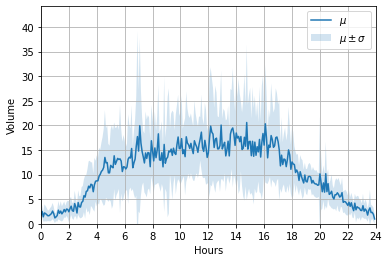

In [7]:
h = 344
w = 96
volume_daily = volume_arr[:,:,h,w]
coords_str = f"({h},{w})"
print("Mean: ", np.mean(volume_daily))
volume_mean = np.mean(volume_daily, axis=0)
volume_err = np.std(volume_daily, axis=0)
plt.plot(volume_mean, label="$\mu$")
plt.fill_between(np.arange(volume_mean.shape[0]), volume_mean+volume_err, volume_mean-volume_err, alpha=0.2, label="$\mu \pm \sigma$")
plt.ylim(0,np.max(volume_mean+volume_err)+5)
plt.xlim(0,288)
plt.grid(True)
plt.ylabel("Volume")
plt.xlabel("Hours")
plt.legend()
plt.xticks(np.arange(0,288+1,24),np.arange(0,24+1,2))
plt.savefig(os.path.join(FIG_DIR,f"volume_{coords_str}.pdf"), bbox_inches="tight")
plt.show()

Visualize speed of the pixel

Mean:  32.29460841049383


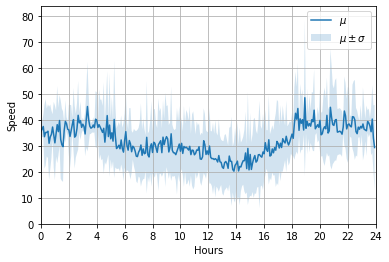

In [8]:
h = 344
w = 96
volume_daily = speed_arr[:,:,h,w]
coords_str = f"({h},{w})"
print("Mean: ", np.mean(volume_daily))
volume_mean = np.mean(volume_daily, axis=0)
volume_err = np.std(volume_daily, axis=0)
plt.plot(volume_mean, label="$\mu$")
plt.fill_between(np.arange(volume_mean.shape[0]), volume_mean+volume_err, volume_mean-volume_err, alpha=0.2, label="$\mu \pm \sigma$")
plt.ylim(0,np.max(volume_mean+volume_err)+5)
plt.xlim(0,288)
plt.grid(True)
plt.ylabel("Speed")
plt.xlabel("Hours")
plt.xticks(np.arange(0,288+1,24),np.arange(0,24+1,2))
plt.legend()
plt.savefig(os.path.join(FIG_DIR,f"speed_{coords_str}.pdf"), bbox_inches="tight")
plt.show()

Visualize Prediction Errors at Hours of Interests

In [199]:
# Prediction error
ERR_PATH = r"C:\Users\jingyli\OwnDrive\IPA\attribution_Result\unet\attribution_pickle\resUnet"

HOI = [84, 132, 204, 264]

DATELIST = ['2019-07-01',
                 '2019-07-11',
                 '2019-07-21',
                 '2019-07-31',
                 '2019-08-10',
                 '2019-08-20',
                 '2019-08-30',
                 '2019-09-09',
                 '2019-09-19',
                 '2019-09-29',
                 '2019-10-09',
                 '2019-10-19',
                 '2019-10-29',
                 '2019-11-08',
                 '2019-11-18',
                 '2019-11-28',
                 '2019-12-08',
                 '2019-12-18']

roi = {
   "busy": (300,105),
   "urban": (330,179),
    "suburban": (370,199)
}

from collections import defaultdict

roi_h_dict = defaultdict(dict)

for h in HOI:
    err_dict = defaultdict(list)
    for d in DATELIST:
        err = np.load(os.path.join(ERR_PATH, f"{d}_{h}", f"{d}_berlin_9ch{h}-err-pred.npy"))[:, 8:-9, 6:-6]
        for r, coords in roi.items():
            cur_err = err[:,coords[0],coords[1]]
#             re_vol = np.absolute(cur_err[2] / (cur_err[0]+cur_err[2])) if (cur_err[0]+cur_err[2])!= 0 else 0
#             re_s = np.absolute(cur_err[3] / (cur_err[1]+cur_err[3])) if (cur_err[1]+cur_err[3])!= 0 else 0
            re_vol = np.absolute(cur_err[2])
            re_s = np.absolute(cur_err[3])
            err_dict[r].append([re_vol,re_s])
    for r, l in err_dict.items():
        l = np.asarray(l)
        mean = np.mean(l, axis=0)
        std = np.std(l, axis=0)
        roi_h_dict[r][h] = [mean, std]

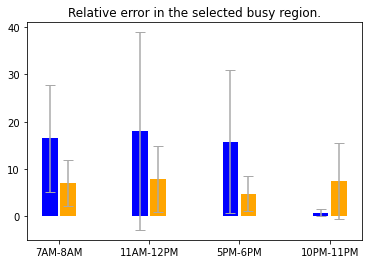

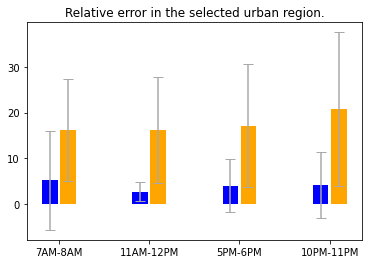

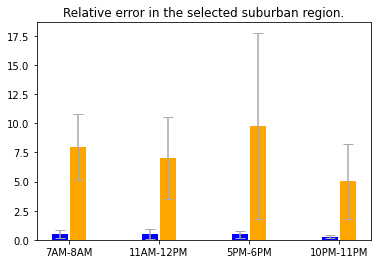

In [200]:
x = np.arange(4)
xticks = ["7AM-8AM","11AM-12PM","5PM-6PM","10PM-11PM"]
for k in roi.keys():
    for i in x:
        mu = roi_h_dict[k][HOI[i]][0]
        std = roi_h_dict[k][HOI[i]][1]
        plt.bar(i-0.1, height=mu[0], width=0.175, color="blue")
        plt.errorbar(i-0.1, mu[0], yerr=std[0], color="darkgrey", capsize=5)
        plt.bar(i+0.1, height=mu[1], width=0.175, color="orange")
        plt.errorbar(i+0.1, mu[1], yerr=std[1], color="darkgrey", capsize=5)
    plt.xticks(x, xticks)
#     plt.ylim(0,1)
    plt.title(f"Relative error in the selected {k} region.")
    plt.savefig(os.path.join(FIG_DIR,f"err_{k}.pdf"), bbox_inches="tight")
    plt.show()

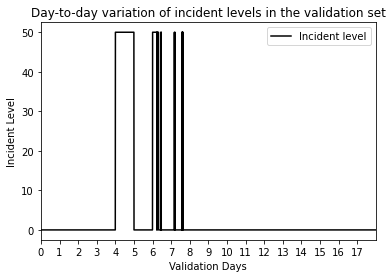

[[  4   0]
 [  4   1]
 [  4   2]
 [  4   3]
 [  4   4]
 [  4   5]
 [  4   6]
 [  4   7]
 [  4   8]
 [  4   9]
 [  4  10]
 [  4  11]
 [  4  12]
 [  4  13]
 [  4  14]
 [  4  15]
 [  4  16]
 [  4  17]
 [  4  18]
 [  4  19]
 [  4  20]
 [  4  21]
 [  4  22]
 [  4  23]
 [  4  24]
 [  4  25]
 [  4  26]
 [  4  27]
 [  4  28]
 [  4  29]
 [  4  30]
 [  4  31]
 [  4  32]
 [  4  33]
 [  4  34]
 [  4  35]
 [  4  36]
 [  4  37]
 [  4  38]
 [  4  39]
 [  4  40]
 [  4  41]
 [  4  42]
 [  4  43]
 [  4  44]
 [  4  45]
 [  4  46]
 [  4  47]
 [  4  48]
 [  4  49]
 [  4  50]
 [  4  51]
 [  4  52]
 [  4  53]
 [  4  54]
 [  4  55]
 [  4  56]
 [  4  57]
 [  4  58]
 [  4  59]
 [  4  60]
 [  4  61]
 [  4  62]
 [  4  63]
 [  4  64]
 [  4  65]
 [  4  66]
 [  4  67]
 [  4  68]
 [  4  69]
 [  4  70]
 [  4  71]
 [  4  72]
 [  4  73]
 [  4  74]
 [  4  75]
 [  4  76]
 [  4  77]
 [  4  78]
 [  4  79]
 [  4  80]
 [  4  81]
 [  4  82]
 [  4  83]
 [  4  84]
 [  4  85]
 [  4  86]
 [  4  87]
 [  4  88]
 [  4  89]
 [  4  90]

In [18]:
coords = [262,259] # [263,254] # [262,259]
coords_str = f"({coords[0]},{coords[1]})"
plt.figure(figsize=(6,4))
plt.plot(incident_arr[:,:,coords[0],coords[1]].reshape(-1), color="black", label="Incident level")
plt.title(f"Day-to-day variation of incident levels in the validation set")
plt.xticks(np.arange(0,5000,288), np.arange(18))
# plt.grid("on")
plt.xlabel("Validation Days")
plt.ylabel("Incident Level")
plt.legend()
plt.xlim(0,5184)
# plt.savefig(os.path.join(FIG_DIR,f"anomaly_{coords_str}.pdf"), bbox_inches="tight")
plt.show()
print(np.argwhere(incident_arr[:,:,coords[0],coords[1]]>40))

# Local temporal variation of incident levels

Time series of incident per pixel

In [6]:
day_incident_timeseries = incident_arr.reshape(-1, incident_arr.shape[-2], incident_arr.shape[-1])[:, road].transpose()
road_idx = np.argwhere(road)
# Filter out pixels if incident = 0 for all timestamps
good_day_mask = np.sum(day_incident_timeseries, axis=1)>0
good_day_idx = np.argwhere(good_day_mask)
print("Road index shape ", road_idx.shape)
print("good_day_idx ", good_day_idx.shape)

day_incident_timeseries = day_incident_timeseries[good_day_mask]
print("Day incident timeseries shape ", day_incident_timeseries.shape)


Road index shape  (80782, 2)
good_day_idx  (1793, 1)
Day incident timeseries shape  (1793, 5184)


### Time Series Anomaly Detection by Statistical Profiling Approach

In [7]:
miu = np.mean(day_incident_timeseries, axis=1)
sigma = np.std(day_incident_timeseries, axis=1)

In [8]:
outlier_mask = ((day_incident_timeseries>(miu+3*sigma)[:,None]) | (day_incident_timeseries<(miu-3*sigma)[:,None]))
# For each pixel, we filter out outliers
pixel_outlier_mask = np.sum(outlier_mask, axis=1)>50

outlier_idx = np.argwhere(pixel_outlier_mask)

def get_pixelcoords(road_idx, good_day_idx, outlier_idx, idxs):
    return road_idx[good_day_idx[outlier_idx[idxs]]].reshape(-1,2)

Visualize a timeseries of incident for a filtered pixel

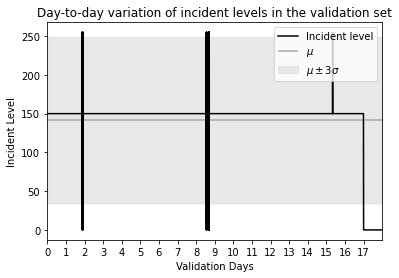

In [93]:
pixel_idx = 15
coords = get_pixelcoords(road_idx, good_day_idx, outlier_idx, pixel_idx)
coords_str = f"({coords[0][0]},{coords[0][1]})"
plt.figure(figsize=(6,4))
plt.plot(day_incident_timeseries[pixel_outlier_mask][pixel_idx], color="black", label="Incident level")
plt.hlines(y=miu[pixel_outlier_mask][pixel_idx], xmin=0, xmax=5184, color="darkgrey", label="$\mu$")
plt.fill_between(np.arange(5184), 
                 miu[pixel_outlier_mask][pixel_idx]+3*sigma[pixel_outlier_mask][pixel_idx], 
                 miu[pixel_outlier_mask][pixel_idx]-3*sigma[pixel_outlier_mask][pixel_idx], 
                 interpolate=True, color="lightgrey", alpha=.5, label="$\mu \pm 3\sigma$")
plt.title(f"Day-to-day variation of incident levels in the validation set")
plt.xticks(np.arange(0,5000,288), np.arange(18))
# plt.grid("on")
plt.xlabel("Validation Days")
plt.ylabel("Incident Level")
plt.legend()
plt.xlim(0,5184)
plt.savefig(os.path.join(FIG_DIR,f"anomaly_{coords_str}.pdf"), bbox_inches="tight")
plt.show()

In [151]:
# Select period
period_idxs = np.argwhere(day_incident_timeseries[pixel_outlier_mask][pixel_idx]>200)
period_idxs[period_idxs>1620]

array([2463, 2465, 2467, 2469, 2471, 2497, 2499, 2501, 2503, 2505, 2507,
       4417], dtype=int64)

Time series of incident changes per pixel

$\Delta incident = I_{i+1} - I_i$

In [113]:
day_incident_timeseries_delta = day_incident_timeseries[:, 1:] - day_incident_timeseries[:, :-1]
day_incident_timeseries_delta.shape

(1793, 5183)

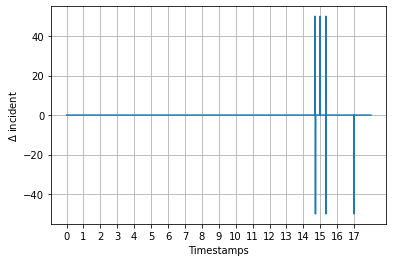

In [115]:
plt.plot(day_incident_timeseries_delta[201])
plt.xticks(np.arange(0,5000,288), np.arange(18))
plt.grid("on")
plt.xlabel("Timestamps")
plt.ylabel("$\Delta$ incident")
plt.show()

## Get statistics to detect large change of incident

In [120]:
sd = np.std(day_incident_timeseries_delta, axis=1)
maxi = np.max(day_incident_timeseries_delta, axis=1)
mini = np.min(day_incident_timeseries_delta, axis=1)
rang = maxi - mini

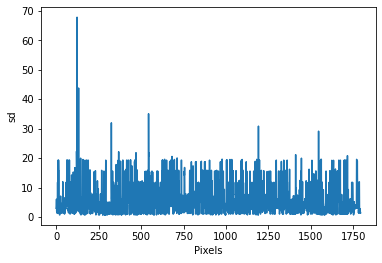

In [117]:
plt.plot(sd)
plt.xlabel("Pixels")
plt.ylabel("sd")
plt.show()

## Visualize the selected pixels' time series of incident level

In [118]:
day_incident_timeseries[sd>20].shape

(16, 5184)

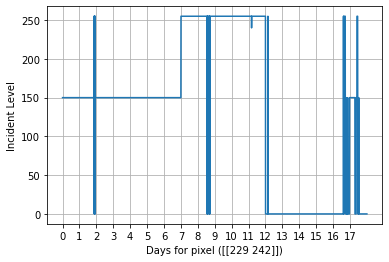

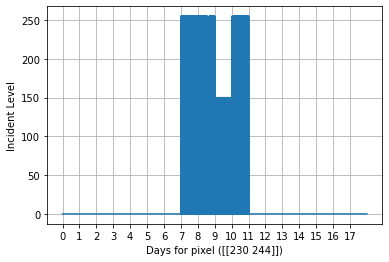

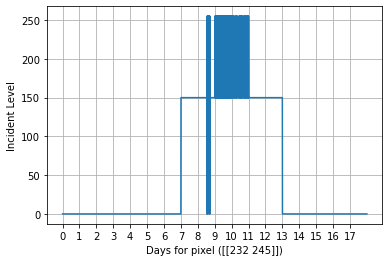

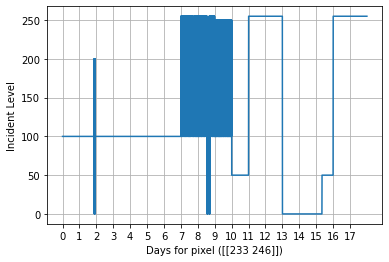

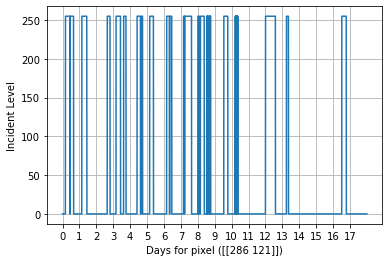

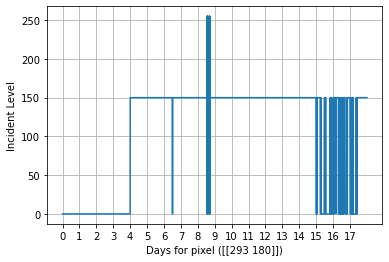

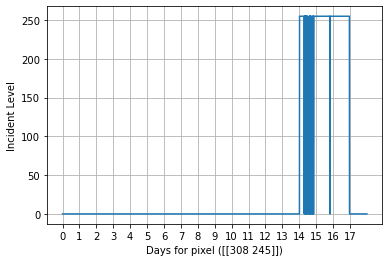

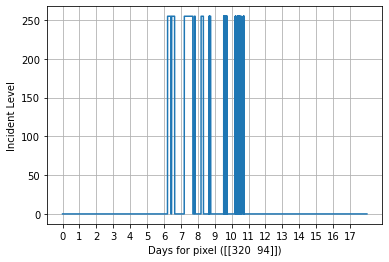

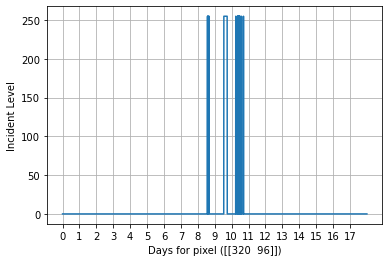

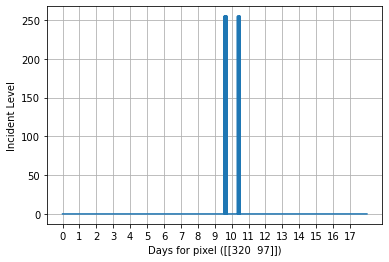

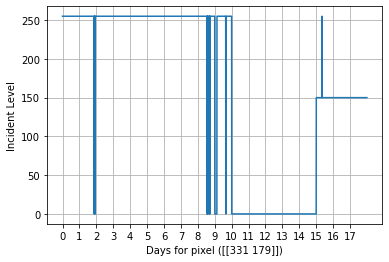

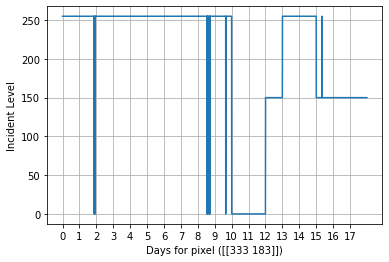

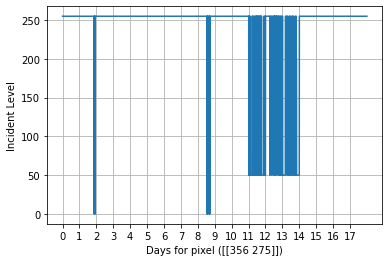

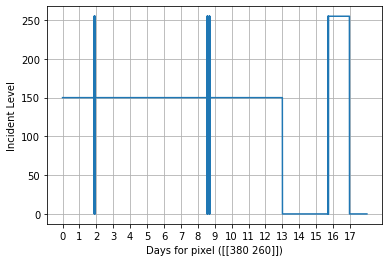

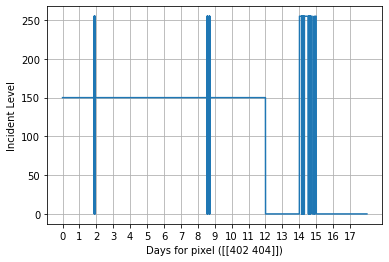

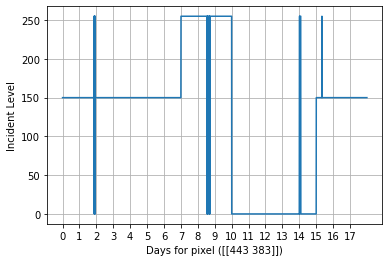

In [170]:
_ = sd>20
for i, t in enumerate(day_incident_timeseries[_]):
    plt.plot(t)
    plt.xticks(np.arange(0,5000,288), np.arange(18))
    plt.grid("on")
    plt.xlabel(f"Days for pixel ({road_idx[good_day_idx[_]][i]})")
    plt.ylabel("Incident Level")
    plt.show()

## Get original location of selected pixels

In [171]:
pixel_coords = road_idx[good_day_idx[sd>20]]


array([[[229, 242]],

       [[230, 244]],

       [[232, 245]],

       [[233, 246]],

       [[286, 121]],

       [[293, 180]],

       [[308, 245]],

       [[320,  94]],

       [[320,  96]],

       [[320,  97]],

       [[331, 179]],

       [[333, 183]],

       [[356, 275]],

       [[380, 260]],

       [[402, 404]],

       [[443, 383]]], dtype=int64)

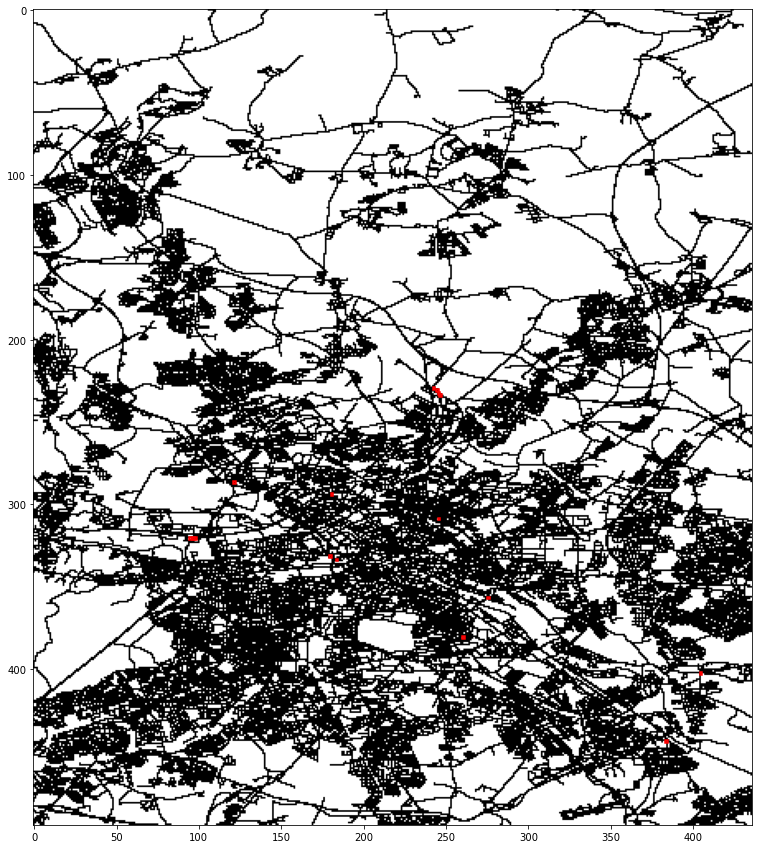

In [172]:
# Visualize road network
def add_patches(x, y, window_size, axes):
    '''
    Add patches over road network
        x: first dim of coordinate of top left corner
        y: second dim of coordinates of top left corner
        window_size: plotted window size
        axes: axis to draw on
    '''
    rect = patches.Rectangle((y, x),
                             window_size, window_size,
                             linewidth=2.5, edgecolor="red", facecolor="none")
    axes.add_patch(rect)
    
fig, axes = plt.subplots(1, 1, figsize=(15,15))
axes.imshow(road, vmin=0, vmax=1, cmap="binary")
for c in pixel_coords:
    add_patches(c[0,0],c[0,1], window_size = 1, axes=axes)
plt.show()

# Incident Maps

Black area -> non-road or road but never has incident

In [155]:
inc_map = np.ones(road.shape)*(-999)
inc_map[road_idx[good_day_idx.flat].transpose()[0],road_idx[good_day_idx.flat].transpose()[1]] = sd
inc_map_masked = np.ma.masked_where(inc_map < -998, inc_map)

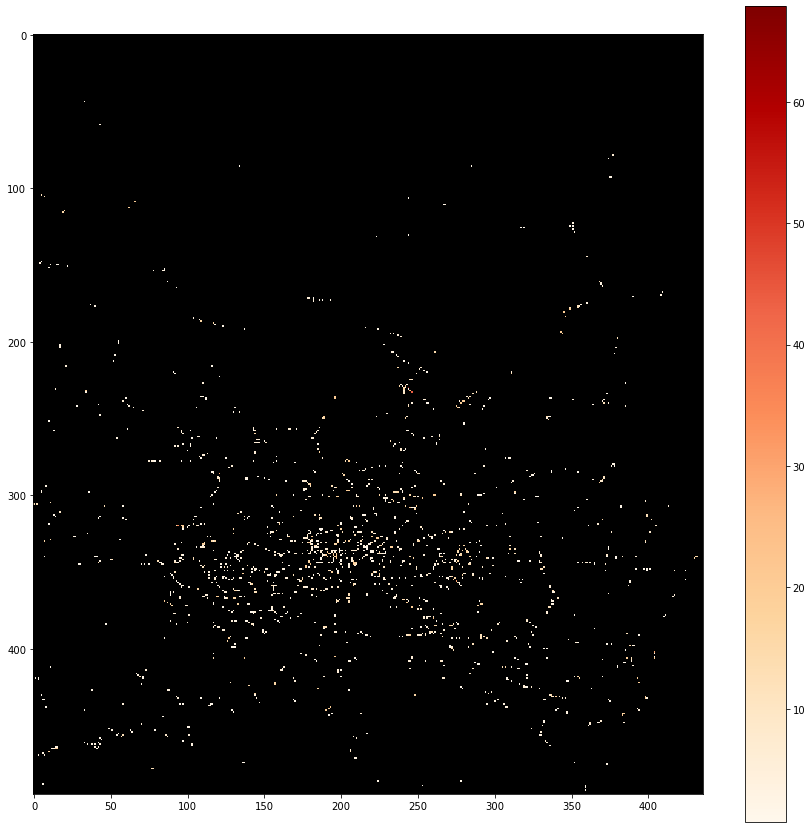

In [165]:
import matplotlib.cm as cm
fig, axes = plt.subplots(1, 1, figsize=(15,15))
cmap = cm.get_cmap("OrRd").copy()
cmap.set_bad(color='black')
cbar = axes.imshow(inc_map_masked, interpolation='none', cmap=cmap, vmin=sd.min(), vmax=sd.max())
plt.colorbar(cbar)
plt.show()

# Findings:

- Most cells (1793/80782 = ~98%) in road network do not have incidents over all validation days 
- Calculate the standard deviation of $\Delta incident$ -> select some pixels with high SD
- In some cases, incident level tends to be stable within one day
- In other cases, it spikes within a day